In [34]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict

In [2]:
df_ads = pd.read_csv("YandexAdsad.csv", sep=';', usecols=[1], names=['text'])

twits1 = pd.read_csv('ptwits.csv', sep=';', usecols=[3], names=['text'])
twits2 = pd.read_csv('ntwits.csv', sep=';', usecols=[3], names=['text'])

df_twits = pd.concat([twits1, twits2])

In [3]:
df_ads['target'] = 1
df_twits['target'] = 0

ads = df_ads[['text', 'target']]
twits = df_twits[['text', 'target']]

In [4]:
def preproc(s: str):
    def is_simple(word: str):
        return all((char.isalpha() for char in word))
    return ' '.join({word for word in s.lower().split() if len(word) > 3 and is_simple(word)})

ads['clear'] = ads['text'].apply(preproc)
twits['clear'] = twits['text'].apply(preproc)

In [5]:
df = pd.concat([ads, twits]).sample(frac=1).reset_index(drop=True)
df = df[df['clear'] != '']

In [6]:
import gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [7]:
w2v_model = gensim.models.word2vec.Word2Vec(size=1000, 
                                            window=10, 
                                            min_count=10, 
                                            workers=4,
                                            hs=1,
                                            negative=0)

In [8]:
w2v_model.build_vocab(df['clear'].apply(str.split))

2021-01-19 00:59:55,252 : INFO : collecting all words and their counts
2021-01-19 00:59:55,255 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-01-19 00:59:55,272 : INFO : PROGRESS: at sentence #10000, processed 41152 words, keeping 10541 word types
2021-01-19 00:59:55,293 : INFO : PROGRESS: at sentence #20000, processed 82385 words, keeping 16169 word types
2021-01-19 00:59:55,311 : INFO : PROGRESS: at sentence #30000, processed 124023 words, keeping 20628 word types
2021-01-19 00:59:55,329 : INFO : PROGRESS: at sentence #40000, processed 165052 words, keeping 24377 word types
2021-01-19 00:59:55,349 : INFO : PROGRESS: at sentence #50000, processed 206407 words, keeping 27717 word types
2021-01-19 00:59:55,369 : INFO : PROGRESS: at sentence #60000, processed 247722 words, keeping 30574 word types
2021-01-19 00:59:55,387 : INFO : PROGRESS: at sentence #70000, processed 289142 words, keeping 33359 word types
2021-01-19 00:59:55,406 : INFO : PROGRESS: at se

2021-01-19 00:59:56,809 : INFO : PROGRESS: at sentence #720000, processed 2973156 words, keeping 111273 word types
2021-01-19 00:59:56,831 : INFO : PROGRESS: at sentence #730000, processed 3014417 words, keeping 112032 word types
2021-01-19 00:59:56,849 : INFO : PROGRESS: at sentence #740000, processed 3055692 words, keeping 112751 word types
2021-01-19 00:59:56,872 : INFO : PROGRESS: at sentence #750000, processed 3097079 words, keeping 113508 word types
2021-01-19 00:59:56,891 : INFO : PROGRESS: at sentence #760000, processed 3138247 words, keeping 114223 word types
2021-01-19 00:59:56,915 : INFO : PROGRESS: at sentence #770000, processed 3179730 words, keeping 114996 word types
2021-01-19 00:59:56,941 : INFO : PROGRESS: at sentence #780000, processed 3220969 words, keeping 115734 word types
2021-01-19 00:59:56,960 : INFO : PROGRESS: at sentence #790000, processed 3262442 words, keeping 116524 word types
2021-01-19 00:59:56,980 : INFO : PROGRESS: at sentence #800000, processed 330382

2021-01-19 00:59:58,428 : INFO : PROGRESS: at sentence #1430000, processed 5903839 words, keeping 155226 word types
2021-01-19 00:59:58,448 : INFO : PROGRESS: at sentence #1440000, processed 5945242 words, keeping 155747 word types
2021-01-19 00:59:58,470 : INFO : PROGRESS: at sentence #1450000, processed 5986578 words, keeping 156285 word types
2021-01-19 00:59:58,487 : INFO : PROGRESS: at sentence #1460000, processed 6027985 words, keeping 156825 word types
2021-01-19 00:59:58,510 : INFO : PROGRESS: at sentence #1470000, processed 6069414 words, keeping 157350 word types
2021-01-19 00:59:58,535 : INFO : PROGRESS: at sentence #1480000, processed 6110783 words, keeping 157855 word types
2021-01-19 00:59:58,554 : INFO : PROGRESS: at sentence #1490000, processed 6152387 words, keeping 158390 word types
2021-01-19 00:59:58,574 : INFO : PROGRESS: at sentence #1500000, processed 6193858 words, keeping 158893 word types
2021-01-19 00:59:58,593 : INFO : PROGRESS: at sentence #1510000, process

2021-01-19 00:59:59,986 : INFO : PROGRESS: at sentence #2140000, processed 8838447 words, keeping 188416 word types
2021-01-19 01:00:00,023 : INFO : PROGRESS: at sentence #2150000, processed 8879575 words, keeping 188872 word types
2021-01-19 01:00:00,043 : INFO : PROGRESS: at sentence #2160000, processed 8921058 words, keeping 189283 word types
2021-01-19 01:00:00,067 : INFO : PROGRESS: at sentence #2170000, processed 8962360 words, keeping 189672 word types
2021-01-19 01:00:00,088 : INFO : PROGRESS: at sentence #2180000, processed 9003679 words, keeping 190084 word types
2021-01-19 01:00:00,111 : INFO : PROGRESS: at sentence #2190000, processed 9044900 words, keeping 190450 word types
2021-01-19 01:00:00,129 : INFO : PROGRESS: at sentence #2200000, processed 9086421 words, keeping 190873 word types
2021-01-19 01:00:00,155 : INFO : PROGRESS: at sentence #2210000, processed 9127735 words, keeping 191281 word types
2021-01-19 01:00:00,174 : INFO : PROGRESS: at sentence #2220000, process

In [9]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 36100


In [10]:
docs=df['clear'].apply(str.split)

In [11]:
w2v_model.train(docs, total_examples=len(docs), epochs=3)

2021-01-19 01:00:17,625 : INFO : training model with 4 workers on 36100 vocabulary and 1000 features, using sg=0 hs=1 sample=0.001 negative=0 window=10
2021-01-19 01:00:18,693 : INFO : EPOCH 1 - PROGRESS: at 1.80% examples, 137439 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:00:19,710 : INFO : EPOCH 1 - PROGRESS: at 3.69% examples, 143782 words/s, in_qsize 5, out_qsize 2
2021-01-19 01:00:20,825 : INFO : EPOCH 1 - PROGRESS: at 5.80% examples, 146908 words/s, in_qsize 7, out_qsize 0
2021-01-19 01:00:21,838 : INFO : EPOCH 1 - PROGRESS: at 7.81% examples, 149953 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:00:22,967 : INFO : EPOCH 1 - PROGRESS: at 10.02% examples, 151699 words/s, in_qsize 7, out_qsize 0
2021-01-19 01:00:24,042 : INFO : EPOCH 1 - PROGRESS: at 12.24% examples, 154050 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:00:25,075 : INFO : EPOCH 1 - PROGRESS: at 14.36% examples, 155494 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:00:26,089 : INFO : EPOCH 1 - PROGRESS: at 16.48

2021-01-19 01:01:29,870 : INFO : EPOCH 2 - PROGRESS: at 35.28% examples, 158626 words/s, in_qsize 7, out_qsize 0
2021-01-19 01:01:31,021 : INFO : EPOCH 2 - PROGRESS: at 37.18% examples, 157074 words/s, in_qsize 7, out_qsize 0
2021-01-19 01:01:32,157 : INFO : EPOCH 2 - PROGRESS: at 39.29% examples, 156659 words/s, in_qsize 8, out_qsize 1
2021-01-19 01:01:33,160 : INFO : EPOCH 2 - PROGRESS: at 41.51% examples, 157665 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:01:34,192 : INFO : EPOCH 2 - PROGRESS: at 43.62% examples, 157979 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:01:35,227 : INFO : EPOCH 2 - PROGRESS: at 45.21% examples, 156427 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:01:36,238 : INFO : EPOCH 2 - PROGRESS: at 46.80% examples, 155161 words/s, in_qsize 7, out_qsize 0
2021-01-19 01:01:37,239 : INFO : EPOCH 2 - PROGRESS: at 48.38% examples, 154033 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:01:38,319 : INFO : EPOCH 2 - PROGRESS: at 50.08% examples, 152885 words/s, in_qsiz

2021-01-19 01:02:42,399 : INFO : EPOCH 3 - PROGRESS: at 72.36% examples, 158685 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:02:43,496 : INFO : EPOCH 3 - PROGRESS: at 74.79% examples, 159247 words/s, in_qsize 7, out_qsize 0
2021-01-19 01:02:44,533 : INFO : EPOCH 3 - PROGRESS: at 77.11% examples, 159809 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:02:45,568 : INFO : EPOCH 3 - PROGRESS: at 79.22% examples, 159921 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:02:46,604 : INFO : EPOCH 3 - PROGRESS: at 81.44% examples, 160228 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:02:47,638 : INFO : EPOCH 3 - PROGRESS: at 83.65% examples, 160521 words/s, in_qsize 7, out_qsize 0
2021-01-19 01:02:48,649 : INFO : EPOCH 3 - PROGRESS: at 85.55% examples, 160303 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:02:49,653 : INFO : EPOCH 3 - PROGRESS: at 87.66% examples, 160501 words/s, in_qsize 8, out_qsize 0
2021-01-19 01:02:50,768 : INFO : EPOCH 3 - PROGRESS: at 89.99% examples, 160674 words/s, in_qsiz

(24126335, 28399998)

In [12]:
w2v_model.most_similar(positive=['хорошо'])

<ipython-input-12-909e824b505e>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  w2v_model.most_similar(positive=['хорошо'])
2021-01-19 01:02:55,293 : INFO : precomputing L2-norms of word weight vectors


[('круто', 0.6636732816696167),
 ('равно', 0.5947503447532654),
 ('зато', 0.5919466018676758),
 ('ваще', 0.5870949625968933),
 ('жаль', 0.580672025680542),
 ('плохо', 0.5727134346961975),
 ('вечером', 0.5648423433303833),
 ('классно', 0.563395082950592),
 ('кажется', 0.5622498989105225),
 ('люблю', 0.5616658926010132)]

In [13]:
def chuncks(gen, chunck_size=100):
    iterator = iter(gen)
    flag = True
    while flag:
        res = []
        for _ in range(chunck_size):
            try:
                res.append(next(iterator)) 
            except StopIteration:
                flag = False
                break
        yield res   


for chunc in chuncks(range(20), 3):
    print(chunc)

[0, 1, 2]
[3, 4, 5]
[6, 7, 8]
[9, 10, 11]
[12, 13, 14]
[15, 16, 17]
[18, 19]


In [14]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 2062780
TEST size: 229198


In [15]:
def get_text_vector(text: str):
    return sum(np.array([w2v_model.wv[word] if (word in w2v_model.wv) else np.zeros(1000) for word in text.split() ]))

def vectors_generator(texts):
    for text in texts:
        yield get_text_vector(text)
test_res = []

In [16]:
text_vec=[]
for num in range(len(df_test['clear'])):
    text_vec.append(get_text_vector(df_test.clear.iloc[num]))

In [17]:
def model_test(model):
    test_res.append(mlp.score(text_vec,df_test.target))

In [22]:
from sklearn.neural_network import MLPClassifier
   
for alpha1 in range(4):
    for batch_size1 in range(3):
        for learning_rate_init1 in range(4):
            for max_iter1 in range(3):
                for shuffle1 in range(2):
                    mlp = MLPClassifier(alpha=alpha1*10+10,batch_size=batch_size1*400+200,
                                        learning_rate_init=learning_rate_init1/1000+0.001,
                                        max_iter=max_iter1*400+200,shuffle=bool(shuffle1))
                    j = 0
                    for batch in chuncks(zip(vectors_generator(df['clear']), df['target']), 3000):
                    #     print([(len(item), target) for item, target in batch])
                        mlp.partial_fit(*list(zip(*batch)), classes=[0,1])
                        j += 1
                        if j % 10 == 0: 
                            print(f"{j}/{len(df)//3000} done...\r", end='')
                    model_test(mlp)
                    print(alpha1,'|',batch_size1,'|',learning_rate_init1,'|',max_iter1,'|',bool(shuffle1))
    
# mlp.partial_fit()
# df_vec = pd.DataFrame(df[['clear', 'target']], columns=['clear', 'target', *list(w2v_model.wv.vocab.keys())])

# df_vec.head()
    

0 | 0 | 0 | 0 | False
0 | 0 | 0 | 0 | True
0 | 0 | 0 | 1 | False
0 | 0 | 0 | 1 | True
0 | 0 | 0 | 2 | False
0 | 0 | 0 | 2 | True
0 | 0 | 1 | 0 | False
0 | 0 | 1 | 0 | True
0 | 0 | 1 | 1 | False
0 | 0 | 1 | 1 | True
0 | 0 | 1 | 2 | False
0 | 0 | 1 | 2 | True
0 | 0 | 2 | 0 | False
0 | 0 | 2 | 0 | True
0 | 0 | 2 | 1 | False
0 | 0 | 2 | 1 | True
0 | 0 | 2 | 2 | False
0 | 0 | 2 | 2 | True
0 | 0 | 3 | 0 | False
0 | 0 | 3 | 0 | True
0 | 0 | 3 | 1 | False
0 | 0 | 3 | 1 | True
0 | 0 | 3 | 2 | False
0 | 0 | 3 | 2 | True
0 | 1 | 0 | 0 | False
0 | 1 | 0 | 0 | True
0 | 1 | 0 | 1 | False
0 | 1 | 0 | 1 | True
0 | 1 | 0 | 2 | False
0 | 1 | 0 | 2 | True
0 | 1 | 1 | 0 | False
0 | 1 | 1 | 0 | True
0 | 1 | 1 | 1 | False
0 | 1 | 1 | 1 | True
0 | 1 | 1 | 2 | False
0 | 1 | 1 | 2 | True
0 | 1 | 2 | 0 | False
0 | 1 | 2 | 0 | True
0 | 1 | 2 | 1 | False
0 | 1 | 2 | 1 | True
0 | 1 | 2 | 2 | False
0 | 1 | 2 | 2 | True
0 | 1 | 3 | 0 | False
0 | 1 | 3 | 0 | True
0 | 1 | 3 | 1 | False
0 | 1 | 3 | 1 | True
0 | 1 | 3 |

In [37]:
test_res

[0.9680800006980864,
 0.9683068787685757,
 0.9677484096719867,
 0.9680800006980864,
 0.9676524227960105,
 0.9707850853846892,
 0.9676698749552789,
 0.9692798366477893,
 0.9684377699630887,
 0.9698164905452927,
 0.967805129189609,
 0.9674997164024118,
 0.9671812144957634,
 0.9693583713644971,
 0.9681410832555258,
 0.9712693828043875,
 0.9667929039520414,
 0.970907250499568,
 0.9676087923978394,
 0.9711733959284112,
 0.9665747519611864,
 0.9696594211118771,
 0.9666794649167968,
 0.9698993883018177,
 0.9664962172444785,
 0.9686428328344925,
 0.9663304217314287,
 0.9700259164565136,
 0.9792886499882197,
 0.9793322803863908,
 0.9793322803863908,
 0.979554795417063,
 0.9794151781429158,
 0.979384636864196,
 0.9791010392760844,
 0.9791403066344383,
 0.9792101152715119,
 0.9795678845365143,
 0.9790443197584621,
 0.9789919632806569,
 0.9790748610371818,
 0.978695276573094,
 0.9791359435946212,
 0.9791097653557186,
 0.9789614220019371,
 0.9789265176834003,
 0.9788654351259609,
 0.978847982966692

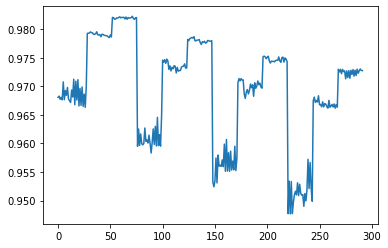

In [36]:

plt.plot(range(len(test_res)),test_res)